For Aassigment 5 Machine Translation: IBM Model 1

In [9]:
# write code to collect statistics about word frequencies in the two languages. 
# Print the 10 most frequent words in each language.
# using a Counter
from collections import Counter
import re

source="./dat410_europarl/europarl-v7.fr-en.lc.fr"
target="./dat410_europarl/europarl-v7.fr-en.lc.en"

def get_words(filename):
    with open(filename, 'r') as f:
        text = f.read()
    # words = clean_text(text).split(' ')
    return re.findall(r'\b\w+\b', text)

def get_10_most_frequent_words():
    english_words = get_words(target)
    french_words = get_words(source)
    english_word_counts = Counter(english_words)
    french_word_counts = Counter(french_words)
    ten_most_common_english = english_word_counts.most_common(10)
    ten_most_common_french = french_word_counts.most_common(10)
    print('English:', ten_most_common_english)
    print('French:', ten_most_common_french)
    return ten_most_common_english, ten_most_common_french
    
ten_most_common_english, ten_most_common_french = get_10_most_frequent_words()

# print the probabitly of "zebra" in the two languages
english_words = get_words(target)
english_word_counts = Counter(english_words)
print("English:%.15f%%" % (english_word_counts['speaker'] / len(english_words) * 100)) 
print("English:%.15f%%" % (english_word_counts['zebra'] / len(english_words) * 100))

English: [('the', 19627), ('of', 9534), ('to', 8992), ('and', 7214), ('in', 6197), ('is', 4453), ('that', 4421), ('a', 4388), ('we', 3341), ('this', 3332)]
French: [('apos', 16729), ('de', 14528), ('la', 9746), ('et', 6620), ('l', 6536), ('le', 6177), ('à', 5588), ('les', 5587), ('des', 5232), ('que', 4797)]
English:0.004570784308497%
English:0.000000000000000%


In [10]:
# bigram language model

from math import log,exp

class BigramLanguageModel:
    def __init__(self):
        pass

    def train(self, words):
        self.bigrams = Counter(zip(words, words[1:]))
        self.unigrams = Counter(words)
        self.total = len(words)
        
    def probability_w(self, word1, word2):
        if self.unigrams[word1] == 0 \
            or self.unigrams[word2] ==0 \
            or self.bigrams[(word1,word2)] == 0:
            # if word non exist
            return 1.0 / (self.total + 1)
        return self.bigrams[(word1,word2)]/self.unigrams[word1]
    
    def predict(self, words: list):
        # length of words should be at least 1
        if len(words) == 0: return 1
        Ps=1.0 # the probability_w (words[0]|<start>) is 1
        for i in range(1,len(words)):
            pt = self.probability_w(words[i-1],words[i])
            Ps = Ps* pt
            print("P(%s|%s) is %.15f \t P(S): %.15f" %(words[i],words[i-1], pt, Ps))
            # print("\t (%s, %s):%d, (%s): %d" %(words[i-1],words[i],
            #                                    self.bigrams[(words[i-1],words[i])], 
            #                                    words[i-1],
            #                                    self.unigrams[words[i-1]]))
        return Ps
    
    def predict_log(self, words: list):
        # length of words should be at least 1
        if len(words) == 0: return 1
        Ps=0.0 # the probability_w (words[0]|<start>) is 1
        for i in range(1,len(words)):
            pt = log(self.probability_w(words[i-1],words[i]))
            Ps = Ps + pt
            # print("P(%s|%s) is %.15f \t P(S): %.15f" %(words[i],words[i-1], pt, Ps))
            # print("\t (%s, %s):%d, (%s): %d" %(words[i-1],words[i],
            #                                    self.bigrams[(words[i-1],words[i])], 
            #                                    words[i-1],
            #                                    self.unigrams[words[i-1]]))
        return exp(Ps)

En_bigramM = BigramLanguageModel()
En_bigramM.train(english_words)



# print(english_words[:100])

# debug
# En_bigamM.probability_w('please','open') 
# En_bigamM.bigrams.most_common(10)
# 

# case 1 normal short sentence "the house rose", from dataset
print("----- Normal case")
sentence = "the house rose"
print("P('%s') is %.15f, lP: %.15f " % (sentence, 
                En_bigramM.predict(sentence.split(' ')),
                En_bigramM.predict_log(sentence.split(' '))))
print("-----")
sentence = "it says that this should be done"
print("P('%s') is %.15f, lP: %.15f " % (sentence, 
                En_bigramM.predict(sentence.split(' ')),
                En_bigramM.predict_log(sentence.split(' '))))

# case 2 words non exist
print("----- Non exist")
sentence = "the house rose NNN"
print("P('%s') is %.15f, lP: %.15f " % (sentence, 
                En_bigramM.predict(sentence.split(' ')),
                En_bigramM.predict_log(sentence.split(' '))))

# case 3 words super length
print("----- over length")
sentence = "you will be aware from the press and television that there have been a number of bomb explosions and killings in sri lanka"
print("len(%d) ,P('%s ...') is %.15f, lP: %.15f " % (len(sentence),
                sentence[:10],
                En_bigramM.predict(sentence.split(' ')),
                En_bigramM.predict_log(sentence.split(' '))))

----- Normal case
P(house|the) is 0.002139909308605 	 P(S): 0.002139909308605
P(rose|house) is 0.006329113924051 	 P(S): 0.000013543729801
P('the house rose') is 0.000013543729801, lP: 0.000013543729801 
-----
P(says|it) is 0.001999200319872 	 P(S): 0.001999200319872
P(that|says) is 0.529411764705882 	 P(S): 0.001058400169344
P(this|that) is 0.046821985976024 	 P(S): 0.000049556397886
P(should|this) is 0.003901560624250 	 P(S): 0.000000193347291
P(be|should) is 0.295402298850575 	 P(S): 0.000000057115234
P(done|be) is 0.016312594840668 	 P(S): 0.000000000931698
P('it says that this should be done') is 0.000000000931698, lP: 0.000000000931698 
----- Non exist
P(house|the) is 0.002139909308605 	 P(S): 0.002139909308605
P(rose|house) is 0.006329113924051 	 P(S): 0.000013543729801
P(NNN|rose) is 0.000003808972415 	 P(S): 0.000000000051588
P('the house rose NNN') is 0.000000000051588, lP: 0.000000000051588 
----- over length
P(will|you) is 0.052256532066508 	 P(S): 0.052256532066508
P(be|wi

In [11]:
# translate model IBM1

def print_n_words(english_words, t):
    for word in english_words:
        sorted_t = sorted(t[word].items(), key=lambda x: x[1], reverse=True)
        print("%s \t %s" % (word, sorted_t[0:10]))

class IBM1():
    def __init__(self):
        self.t = {}
                  
    def train(self, source_txt, target_txt, n_iter=5):
         
        source_sentences = source_txt.split('\n')
        target_sentences = target_txt.split('\n')
        print("source_sentences: %d, target_sentences: %d" % (len(source_sentences), len(target_sentences)))  
        # get words
        sa_words = re.findall(r'\w+', source_txt.lower())
        ta_words = re.findall(r'\w+', target_txt.lower())
        print("source_words: %d, target_words: %d" % (len(sa_words), len(ta_words)))
                
        # self.t, c_e_f, c_e = self.init_t_c(s_words, t_words)
        c_e_f={}
        c_e={}
        # start iteration
        print("Start iteration")
        def single_iteration():
            # set c(e -> f) and c(e) to 0
            for key in c_e.keys():
                c_e[key] = 0.0
            for key in c_e_f.keys():
                c_e_f[key] = 0.0
            # update c(e -> f) and c(e)
            for k in range(len(source_sentences)):
                s_sentences = source_sentences[k]
                t_sentences = target_sentences[k]
                
                s_words = re.findall(r'\w+', s_sentences)
                t_words = re.findall(r'\w+', t_sentences)
                
                for i in range(len(s_words)):
                    f = s_words[i]
                    esum = 0.0
                    for j in range(len(t_words)):
                        e = t_words[j]
                        if e not in self.t:
                            #  initialize t(e|f) uniformly
                            self.t[e] = {f: 1.0}
                        if f not in self.t[e]:
                            self.t[e][f] = 1.0
                        esum += self.t[e][f]
                        
                    for j in range(len(t_words)):
                        e = t_words[j]
                        theta = self.t[e][f]/esum
                        if (e,f) not in c_e_f:
                            c_e_f[(e,f)] = 0.0
                        c_e_f[(e,f)] += theta
                        if e not in c_e:
                            c_e[e] = 0.0
                        c_e[e] += theta
                # update t(e|f)
            # print("update t(e|f)")
            for e in self.t.keys():
                for f in self.t[e].keys():
                    self.t[e][f] = c_e_f[(e,f)]/c_e[e]
                    # print("t(%s|%s) = %.15f" % (e,f, self.t[e][f]))
                        
        for i in range(n_iter):
            single_iteration()
            print("done iteration %d" % (i+1)) 
            print_n_words(["european"], self.t)
            print("")
   
                            
french_text = open(source, 'r').read()
english_text = open(target, 'r').read()
print("source: %s, target: %s" % (french_text[:10], english_text[:10]))

ibm1 = IBM1()
# how many iteration we should run?
ibm1.train(french_text, english_text, n_iter=10)


source: je déclare, target: i declare 
source_sentences: 10001, target_sentences: 10001
source_words: 300843, target_words: 262537
Start iteration
done iteration 1
european 	 [('apos', 0.061303760197027324), ('de', 0.05244150318322246), ('la', 0.03334956717801669), ('l', 0.030437652799466627), ('le', 0.02237151005233982), ('et', 0.021096483405532492), ('européenne', 0.017470748371094965), ('les', 0.01715472257961809), ('à', 0.01708830184441074), ('des', 0.015994861187823436)]

done iteration 2
european 	 [('apos', 0.09539136956634232), ('européenne', 0.09392552466021101), ('de', 0.07910965058152969), ('l', 0.0550446241577374), ('européen', 0.049292267375503664), ('la', 0.04659814082371237), ('union', 0.036461485418055536), ('le', 0.03263639237724352), ('et', 0.02765991839613385), ('à', 0.021652868040345004)]

done iteration 3
european 	 [('européenne', 0.2144609887065137), ('européen', 0.11587607714485212), ('apos', 0.09306539526957101), ('de', 0.07569906038711674), ('l', 0.06198388232

In [14]:
# Deconding 
# our goal is to find E = argmax P(E|F) = argmax P(F|E)P(E)
# in the word alignment model:
# is to find the best alignment E = argmax P(F,A|E,m), where A is the set of alignment, and 
# m is the length of F.
# And P(F,A|E,m) = P(A|E,m)*P(F|A,E,m)
# in IBM1 model, alignments are independent of each other and of the English words
# so P(A|E,m) = \prod_{i=1}^{m} q(a_i|E,m), and  we assume alignments are uniform
# so P(A|E,m) can be ignored
# thus argmax P(F,A|E,m) = P(F|A,E,m)
# and assuming that word depends only on the english word it is aligned with
# so P(F|A,E,m) = \prod_{i=1}^{m} t(f_i|e_{a_i})
# thus argmax P(F|A,E,m) = \prod_{i=1}^{m} t(f_i|e_{a_i})

# so it is a search problem, we can use greedy search, or beam search, or A* search

def greedy_search(t, s_words):
    t = t
    s_words = s_words
    t_words = []
    for f in s_words:
        e_p = 0 
        e = None
        for es in t.keys():
            for fs in t[es]:
                if fs ==f and t[es][fs]*english_word_counts[es] > e_p:
                    # print("t(%s|%s) = %.15f" % (es,f, t[es][f]))
                    e_p = t[es][f]*english_word_counts[es]
                    e = es
        if e is not None:
            t_words.append(e)
        else:
            t_words.append(f)
    return t_words

# test greedy search

sf = "le parlement"
print("source: %s" % sf)
print(greedy_search(ibm1.t, re.findall(r'\w+', sf)))

sf = "madame la présidente , c &apos; est une motion de procédure "
print("source: %s" % sf)
print(greedy_search(ibm1.t, re.findall(r'\w+', sf)))

sf = "je vous avouerai que , pour le moment , les choses me semblent un petit peu confuses ."
print("source: %s" % sf)
print(greedy_search(ibm1.t, re.findall(r'\w+', sf)))

source: le parlement
['the', 'parliament']
source: madame la présidente , c &apos; est une motion de procédure 
['madam', 'the', 'madam', 'is', 'the', 'is', 'a', 'procedural', 'the', 'procedure']
source: je vous avouerai que , pour le moment , les choses me semblent un petit peu confuses .
['i', 'you', 'confused', 'that', 'for', 'the', 'time', 'the', 'things', 'me', 'seem', 'a', 'small', 'little', 'confused']


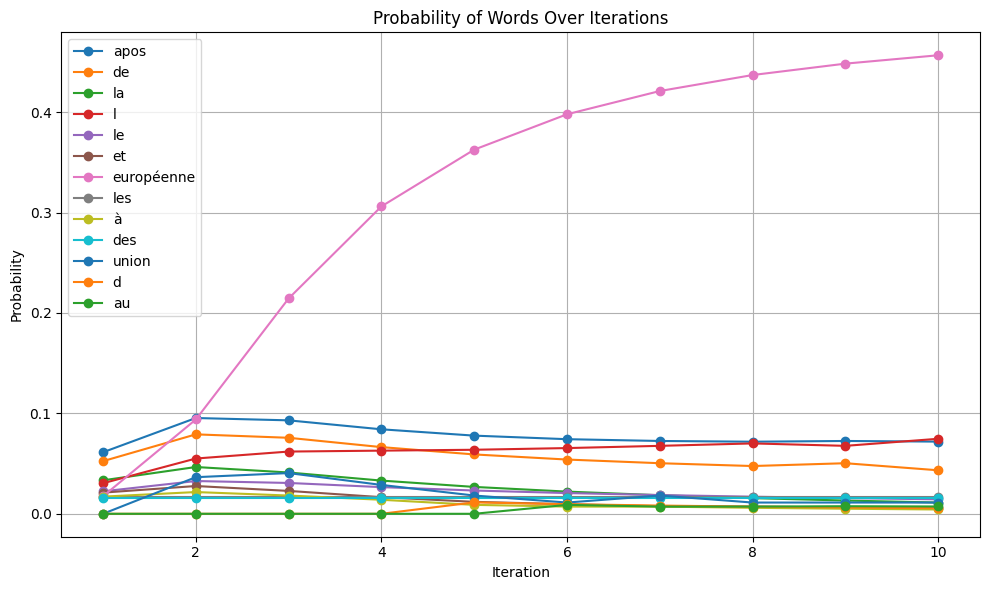

In [13]:

import matplotlib.pyplot as plt

data = {
    "apos": [0.061303760197027324, 0.09539136956634232, 0.09306539526957101, 0.084146689888012, 0.07784650151642765, 0.07430226847966766, 0.07252773724248936, 0.07179455071701304, 0.07252773724248936, 0.07188564808808141],
    "de": [0.05244150318322246, 0.07910965058152969, 0.07569906038711674, 0.06641487294231717, 0.05911939082542544, 0.05402999399170392, 0.050371793212161196, 0.04757116124449875, 0.050371793212161196, 0.043334516968978276],
    "la": [0.03334956717801669, 0.04659814082371237, 0.041134055663651664, 0.033068606138887215, 0.026770783425234774, 0.022095433688198805, 0.01848988547448643, 0.015593837823686951, 0.013202022305243425, 0.011195968393243307],
    "l": [0.030437652799466627, 0.0550446241577374, 0.061983882320843446, 0.06290442802805071, 0.06377039948392663, 0.06545374595132401, 0.06767291363955714, 0.07009049118493589, 0.06767291363955714, 0.07471662069570735],
    "le": [0.02237151005233982, 0.03263639237724352, 0.030706720984867507, 0.02656430349451111, 0.0231826820064307, 0.02064188222790495, 0.018661729095987067, 0.01703625586720617, 0.015642331628040247, 0.014410650699095837],
    "et": [0.021096483405532492, 0.02765991839613385, 0.022787949393605508, 0.01654801526791893, 0.011906180126082041, 0.009554031276812888, 0.007552612826861236, 0.007142215994338287, 0.006281547633682831, 0.0055603962685557284],
    "européenne": [0.017470748371094965, 0.09392552466021101, 0.2144609887065137, 0.306150113478447, 0.36268721400795056, 0.3979130265560956, 0.42105886900474443, 0.436988847167001, 0.44833388585558154, 0.45667425053645194],
    "les": [0.01715472257961809, 0.01715472257961809, 0.01715472257961809, 0.01715472257961809, 0.01715472257961809, 0.01715472257961809, 0.01715472257961809, 0.01715472257961809, 0.01715472257961809, 0.01715472257961809],
    "à": [0.01708830184441074, 0.021652868040345004, 0.018180422754475525, 0.013971209254237033, 0.008899151012013615, 0.0071633863772754824, 0.0071633863772754824, 0.005973867596465537, 0.0050417602337519025, 0.004293034231628162],
    "des": [0.015994861187823436, 0.015994861187823436, 0.015994861187823436, 0.015994861187823436, 0.015994861187823436, 0.015994861187823436, 0.015994861187823436, 0.015994861187823436, 0.015994861187823436, 0.015994861187823436],
    "union": [0, 0.036461485418055536, 0.04055017862690694, 0.028746834006884152, 0.018192240037488, 0.011205673895162839, 0.018192240037488, 0.011205673895162839, 0.011205673895162839, 0.011205673895162839],
    "d": [0, 0, 0, 0, 0.011371156433177815, 0.009554031276812888, 0.008200144589100242, 0.007142215994338287, 0.006281547633682831, 0.0055603962685557284],
    "au": [0, 0, 0, 0, 0, 0.008899151012013615, 0.0071633863772754824, 0.0071633863772754824, 0.007552612826861236, 0.007287180294041534]
}

# Plotting
plt.figure(figsize=(10, 6))

for word, values in data.items():
    plt.plot(range(1, 11), values, marker='o', label=word)

plt.title('Probability of Words Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
